In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import random
import scipy.stats as stats

from sklearn.impute import KNNImputer # Missing value imputation
from sklearn.preprocessing import MinMaxScaler # Scaling data
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from random import randrange

In [2]:
df1 = pd.DataFrame({"treatment" : [1 for i in range(1,142)]})

In [3]:
df2 = pd.DataFrame({"treatment" : [2 for i in range(1,283)]})

In [4]:
df3 = pd.DataFrame({"treatment" : [3 for i in range(1,142)]})

In [5]:
np.random.seed(12345)
vari = ['rcs0', 'rcs1', 'rcs2', 'rcs3']
means = [7.3, 9.2, 10.1, 12.4]
var = [4.24, 4.26, 4.31, 4.54]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [6]:
np.random.seed(12345)
vari = ['ecs0', 'ecs1', 'ecs2', 'ecs3']
means = [13.3, 10.7, 9.5, 6.3]
var = [2.27, 2.21, 2.17, 2.13]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [7]:
np.random.seed(12345)
vari = ['ucs0', 'ucs1', 'ucs2', 'ucs3']
means = [10.2, 7.3, 6.6, 5.4]
var = [3.17, 2.90, 2.87, 2.70]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [8]:
np.random.seed(12345)
vari = ['mi0', 'mi1', 'mi2', 'mi3']
means = [22.3, 21.8, 21.3, 21.7]
var = [4.52, 4.40, 4.37, 4.41]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [9]:
np.random.seed(12345)
vari = ['lp0', 'lp1', 'lp2', 'lp3']
means = [24.2, 23.3, 23.7, 22.8]
var = [4.96, 4.94, 4.98, 4.90]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [10]:
np.random.seed(12345)
vari = ['ai0', 'ai1', 'ai2', 'ai3']
means = [15.7, 14.4, 14.8, 13.2]
var = [3.35, 3.32, 3.89, 3.29]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [11]:
np.random.seed(12345)
vari = ['bmi0', 'bmi1', 'bmi2', 'bmi3']
means = [37.3, 32.6, 30.3, 28.5]
var = [5.97, 5.72, 5.63, 5.52]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [12]:
np.random.seed(12345)
vari = ['bw0', 'bw1', 'bw2', 'bw3']
means = [108.9, 101.5, 92.4, 82.7]
var = [23.14, 20.59, 19.82, 18.67]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [13]:
np.random.seed(12345)
vari = ['wc0', 'wc1', 'wc2', 'wc3']
means = [95.4, 92.6, 90.1, 86.8]
var = [8.57, 8.43, 8.32, 8.54]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [14]:
np.random.seed(12345)
vari = ['scpd0', 'scpd1', 'scpd2', 'scpd3']
means = [73, 65, 54, 48]
var = [15.43, 10.51, 10.24, 9.45]
for i in range(4):
    df1[vari[i]] = np.random.normal(means[i], var[i], 141)

In [15]:
df1.head()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,1,6.432040,14.825610,10.292646,13.462941,12.835314,13.618451,9.596993,6.798692,9.551077,11.129641,6.728281,6.032145,21.374721,27.610490,21.495328,22.732504,23.184650,29.823595,23.922593,23.947227,15.014229,18.784279,14.973873,13.970281,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452,69.841361,78.879147,54.457701,50.212509
1,1,9.330720,11.363930,6.230670,13.634591,14.387201,11.822602,7.551869,6.879224,11.718250,8.773098,4.023439,6.134228,24.464824,24.035045,17.376805,22.899239,26.575559,25.809346,19.229174,24.132488,17.304460,16.086443,11.307728,14.094670,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336,80.390096,70.338710,44.806975,50.569798
2,1,5.097580,6.416356,13.939665,17.987693,12.120874,9.255903,11.433196,8.921539,8.553379,5.405031,9.156807,8.723077,19.952137,18.924874,25.193117,27.127693,21.623584,20.072018,28.136550,28.830770,13.959880,12.230587,18.265498,17.249231,34.198951,28.862336,35.315618,35.293847,96.880188,88.045718,110.057113,105.678464,90.948410,87.091520,97.512068,97.310770,64.985061,58.132370,63.122545,59.630770
3,1,4.943704,9.996533,5.138392,18.248910,12.038492,11.113225,7.001928,9.044092,8.438335,7.842241,3.296099,8.878427,19.788099,22.622710,16.269321,27.381430,21.443578,24.223679,17.967098,29.112700,13.838303,15.020772,10.321890,17.438527,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135,64.425081,66.965155,42.211864,60.174493
4,1,15.634910,7.531250,-1.159025,16.267233,17.762322,9.834287,3.831303,8.114363,16.431524,6.163997,-0.897309,7.699896,31.185328,20.076409,9.884237,25.456498,33.950272,21.364877,10.690733,26.973886,22.285365,13.099472,4.638142,16.002466,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487,103.331994,60.882968,27.250020,56.049638


In [16]:
np.random.seed(12345)
vari = ['rcs0', 'rcs1', 'rcs2', 'rcs3']
means = [8.2, 12.2, 13.1, 13.8]
var = [4.53, 4.62, 4.7, 4.72]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [17]:
np.random.seed(12345)
vari = ['ecs0', 'ecs1', 'ecs2', 'ecs3']
means = [12.8, 4.6, 4.5, 3.2]
var = [2.47,2.31,2.27,2.08]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [18]:
np.random.seed(12345)
vari = ['ucs0', 'ucs1', 'ucs2', 'ucs3']
means = [10.4,4.7,4.5, 3.9]
var = [3.51, 2.89, 2.82, 2.65]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [19]:
np.random.seed(12345)
vari = ['mi0', 'mi1', 'mi2', 'mi3']
means = [22.1,21.5,20.7, 20.2]
var = [4.79,4.68, 4.58, 4.50]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [20]:
np.random.seed(12345)
vari = ['lp0', 'lp1', 'lp2', 'lp3']
means = [24.5, 22.4, 21.8,20.6]
var = [5.72,5.67,5.64,5.62]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [21]:
np.random.seed(12345)
vari = ['ai0', 'ai1', 'ai2', 'ai3']
means = [15, 14.3,13.8,13.3]
var = [4.11,4.05,4.01,3.96]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [22]:
np.random.seed(12345)
vari = ['bmi0', 'bmi1', 'bmi2', 'bmi3']
means = [36.5,31.5,28.1,26.7]
var = [5.87,5.71,5.64,5.61]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [23]:
np.random.seed(12345)
vari = ['bw0', 'bw1', 'bw2', 'bw3']
means = [107.5,100.4,90.7,80.6]
var = [22.59,20.34,19.59,18.88]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [24]:
np.random.seed(12345)
vari = ['wc0', 'wc1', 'wc2', 'wc3']
means = [93.4,91.7,88.4,85.2]
var = [7.89,7.81,7.76,7.63]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [25]:
np.random.seed(12345)
vari = ['scpd0', 'scpd1', 'scpd2', 'scpd3']
means = [69,61,53,41]
var = [18.64,14.53,13.21,10.43]
for i in range(4):
    df2[vari[i]] = np.random.normal(means[i], var[i], 282)

In [26]:
np.random.seed(12345)
vari = ['rcs0', 'rcs1', 'rcs2', 'rcs3']
means = [6.4,7.3,7.5,9.4]
var = [4.01,4.23,4.3,4.41]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [27]:
np.random.seed(12345)
vari = ['ecs0', 'ecs1', 'ecs2', 'ecs3']
means = [13.2,12.8,11.3,10.4]
var = [2.37,2.35,2.27,2.24]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [28]:
np.random.seed(12345)
vari = ['ucs0', 'ucs1', 'ucs2', 'ucs3']
means = [11.4,10.5,9.2,7.5]
var = [2.45,2.41,2.34,2.21]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [29]:
np.random.seed(12345)
vari = ['mi0', 'mi1', 'mi2', 'mi3']
means = [22.2,21.9,21.6,21.9]
var = [4.37,4.65,4.6,4.56]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [30]:
np.random.seed(12345)
vari = ['lp0', 'lp1', 'lp2', 'lp3']
means = [25.4,24.7,24.9,23.8]
var = [6.39,6.41,6.47,6.32]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [31]:
np.random.seed(12345)
vari = ['ai0', 'ai1', 'ai2', 'ai3']
means = [16.2,15.7,14.3,14.8]
var = [4.6,4.54,4.5,4.55]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [32]:
np.random.seed(12345)
vari = ['bmi0', 'bmi1', 'bmi2', 'bmi3']
means = [38.2,34.3,32.7,29.5]
var = [6.23,6.1,5.89,5.82]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [33]:
np.random.seed(12345)
vari = ['bw0', 'bw1', 'bw2', 'bw3']
means = [110.5,103.4,95.7,85.5]
var = [24.45,20.78,19.89,19.78]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [34]:
np.random.seed(12345)
vari = ['wc0', 'wc1', 'wc2', 'wc3']
means = [97.8,95.4,90.5,89.7]
var = [8.75,8.69,8.54,8.43]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [35]:
np.random.seed(12345)
vari = ['scpd0', 'scpd1', 'scpd2', 'scpd3']
means = [80,73,62,53]
var = [23.29,20.35,18.41,16.32]
for i in range(4):
    df3[vari[i]] = np.random.normal(means[i], var[i], 141)

In [36]:
df1.head()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,1,6.432040,14.825610,10.292646,13.462941,12.835314,13.618451,9.596993,6.798692,9.551077,11.129641,6.728281,6.032145,21.374721,27.610490,21.495328,22.732504,23.184650,29.823595,23.922593,23.947227,15.014229,18.784279,14.973873,13.970281,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452,69.841361,78.879147,54.457701,50.212509
1,1,9.330720,11.363930,6.230670,13.634591,14.387201,11.822602,7.551869,6.879224,11.718250,8.773098,4.023439,6.134228,24.464824,24.035045,17.376805,22.899239,26.575559,25.809346,19.229174,24.132488,17.304460,16.086443,11.307728,14.094670,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336,80.390096,70.338710,44.806975,50.569798
2,1,5.097580,6.416356,13.939665,17.987693,12.120874,9.255903,11.433196,8.921539,8.553379,5.405031,9.156807,8.723077,19.952137,18.924874,25.193117,27.127693,21.623584,20.072018,28.136550,28.830770,13.959880,12.230587,18.265498,17.249231,34.198951,28.862336,35.315618,35.293847,96.880188,88.045718,110.057113,105.678464,90.948410,87.091520,97.512068,97.310770,64.985061,58.132370,63.122545,59.630770
3,1,4.943704,9.996533,5.138392,18.248910,12.038492,11.113225,7.001928,9.044092,8.438335,7.842241,3.296099,8.878427,19.788099,22.622710,16.269321,27.381430,21.443578,24.223679,17.967098,29.112700,13.838303,15.020772,10.321890,17.438527,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135,64.425081,66.965155,42.211864,60.174493
4,1,15.634910,7.531250,-1.159025,16.267233,17.762322,9.834287,3.831303,8.114363,16.431524,6.163997,-0.897309,7.699896,31.185328,20.076409,9.884237,25.456498,33.950272,21.364877,10.690733,26.973886,22.285365,13.099472,4.638142,16.002466,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487,103.331994,60.882968,27.250020,56.049638


In [37]:
df2.head()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,2,7.272674,12.406502,15.479097,11.220538,12.294372,4.703251,5.649053,2.063288,9.681476,4.829175,5.927458,2.451785,21.119450,21.709184,23.018354,17.740767,23.329072,22.653434,24.654917,17.528692,14.158652,14.481024,15.829826,11.135875,35.298366,31.755222,30.954917,23.634157,102.875654,101.309145,100.616280,70.282153,91.784857,92.049087,92.328041,81.030234,65.184249,61.649453,59.686782,35.300045
1,2,10.369613,8.052366,20.911468,16.584941,13.982990,2.526183,8.272773,4.427262,12.081091,2.105484,9.186881,5.463579,24.394139,17.298500,28.312026,22.855135,27.239556,17.309722,31.173762,23.915968,16.968457,10.664087,20.464678,15.636519,39.311397,26.373811,37.473762,30.010068,118.319330,82.139637,123.258864,91.739766,97.178863,84.688523,101.297232,89.701929,77.927504,47.955601,74.955211,47.154013
2,2,5.846943,16.315836,7.510748,20.795914,11.516986,6.657918,1.800510,6.282945,8.576770,7.274624,1.146449,7.827791,19.611889,25.669288,15.253453,26.869834,21.528811,27.451253,15.092898,28.929881,12.865107,17.908038,9.031298,19.169454,33.450895,36.586888,21.392898,35.015059,95.765879,118.520367,67.403523,108.583657,89.301629,98.657722,79.171789,96.509073,59.317662,73.944392,37.290635,56.459192
3,2,5.682542,6.881525,13.539908,14.281997,11.427346,1.940762,4.712466,3.412406,8.449387,1.373075,4.763945,4.170613,19.438052,16.112453,21.128676,20.659531,21.321223,15.872780,22.327890,21.173904,12.715948,9.637700,14.175326,13.704388,33.237863,24.926733,28.627890,27.272883,94.946052,76.984894,92.533574,82.527990,89.015288,82.709244,89.126316,85.979161,58.641187,44.273280,54.236422,42.065092
4,2,17.104986,0.131162,10.565930,15.052868,17.655478,-1.434419,3.276098,3.752111,17.299890,-2.849555,2.979558,4.603411,31.516089,9.274423,18.230629,21.394471,35.744265,7.588244,18.759116,22.091762,23.079358,3.720174,11.637953,14.351135,48.039132,16.583752,25.059116,28.189107,151.906983,47.265763,80.137779,85.611470,108.910009,71.297916,84.216088,87.225292,105.642150,23.043242,45.877645,43.768519


In [38]:
df2.describe()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
count,282.0,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2.0,7.938378,12.406172,13.238068,13.637148,12.657350,4.703086,4.566684,3.128235,10.197286,4.828969,4.582841,3.808568,21.823362,21.708849,20.834543,20.044739,24.169652,22.653029,21.965682,20.406096,14.762634,14.480735,13.917798,13.163370,36.160989,31.754814,28.265682,26.506441,106.195355,101.307691,91.275479,79.948594,92.944327,92.048528,88.627959,84.936746,67.923480,61.648414,53.388059,40.640139
std,0.0,4.475970,4.795072,4.368418,4.486200,2.440540,2.397536,2.109853,1.976970,3.468136,2.999515,2.621051,2.518735,4.732869,4.857345,4.256884,4.277098,5.651777,5.884861,5.242102,5.341620,4.060979,4.203472,3.727097,3.763846,5.799987,5.926377,5.242102,5.332115,22.320565,21.110770,18.207939,17.944801,7.795895,8.105955,7.212537,7.252057,18.417677,15.080604,12.278044,9.913362
min,2.0,-3.779175,-1.425967,-0.379682,1.551546,6.268309,-2.212983,-2.010400,-2.197624,1.118123,-3.823603,-3.587809,-2.976780,9.433279,7.697072,7.564480,8.522448,9.373978,5.677222,5.624381,6.016035,4.131477,2.355159,2.299250,3.023754,20.977316,14.659249,11.924381,12.141985,47.762790,40.410353,34.515537,31.606183,72.535609,68.665627,66.144184,65.400062,19.708207,18.146039,15.113488,13.934030
25%,2.0,4.825273,8.980230,10.451308,10.566684,10.959917,2.990115,3.220738,1.775149,7.785145,2.685901,2.910785,2.084685,18.531580,18.238414,18.118934,17.117389,20.238755,18.448464,18.621570,16.750162,11.938161,11.477474,11.540159,10.587302,32.127009,27.520587,24.921570,22.857012,90.671062,86.224648,79.660027,67.666735,87.522164,86.257055,84.026841,79.973262,55.113705,50.873753,45.555485,33.855193
50%,2.0,7.678277,12.684351,13.107690,13.476415,12.515529,4.842175,4.503714,3.057403,9.995751,5.002981,4.504614,3.718326,21.548333,21.990641,20.707493,19.891497,23.841224,22.994430,21.809228,20.214714,14.526649,14.724593,13.806561,13.028517,35.823949,32.098624,28.109228,26.315400,104.898297,102.532401,90.732052,79.305659,92.491304,92.518783,88.412696,84.676916,66.853220,62.523293,53.021613,40.284959
75%,2.0,11.100294,15.124008,16.047446,16.410013,14.381396,6.062004,5.923554,4.350175,12.647247,6.529087,6.268467,5.365368,25.166757,24.461982,23.572192,22.688360,28.162181,25.988555,25.336935,23.707686,17.631392,16.863254,16.314736,15.489757,40.258217,35.113871,31.636935,29.802156,121.963054,113.273229,102.985204,91.040054,98.451505,96.642965,93.266421,89.419153,80.934101,70.196068,61.284204,46.767466
max,2.0,22.917716,30.345180,25.633695,25.405734,20.824891,13.672590,10.553508,8.314391,21.803793,16.050556,12.020217,10.415931,37.662441,39.880831,32.913686,31.264789,43.083959,44.669084,36.840434,34.418692,28.353160,30.206489,24.493642,23.037014,55.571301,53.926185,43.140434,40.494103,180.893643,180.285920,142.941509,127.022935,119.034168,122.373994,109.093931,103.960964,129.560315,118.066982,88.227684,66.645721


In [39]:
df3.head()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,3,5.579122,12.885994,7.692199,10.432504,12.714843,15.903330,11.401463,10.924446,10.898466,13.682564,9.304592,8.017423,21.305428,28.040631,21.805608,22.967623,24.091918,33.164827,25.189192,25.279688,15.258345,21.695369,14.501138,15.865282,36.924671,42.355452,32.963268,30.862624,105.494898,130.841358,96.589031,90.131050,96.008808,106.875717,90.881716,91.673698,75.232359,99.873515,62.822879,56.820967
1,3,8.320563,9.448691,3.639648,10.599239,14.335096,13.993717,9.262093,11.009137,12.573411,11.724195,7.099250,8.100979,24.292982,24.262036,17.470321,23.140029,28.460448,27.956054,19.091517,25.518637,18.403139,18.006160,10.260097,16.037310,41.183817,37.398585,27.412215,31.082669,122.210165,113.955508,77.843627,90.878900,101.990754,99.814214,82.833161,91.992423,91.154590,83.337083,45.472306,57.438000
2,3,4.317051,4.535959,11.330756,14.827693,11.968930,11.264421,13.322283,13.156923,10.127375,8.925215,11.284644,10.220000,19.930053,18.861515,25.698018,27.512308,22.080787,20.511465,30.663952,31.578462,13.810582,12.733393,18.308931,20.400001,34.963897,30.314030,37.947245,36.663078,97.799723,89.821565,113.419474,109.844618,93.254911,89.721627,98.108060,100.075386,67.902272,59.702543,78.400981,73.086156
3,3,4.171521,8.090923,2.549904,15.081430,11.882919,13.239402,8.686810,13.285806,10.038461,10.950621,6.506227,10.347157,19.771459,22.769455,16.304548,27.774676,21.848883,25.898539,17.451832,31.942095,13.643641,16.548887,9.119667,20.661793,34.737800,35.440575,25.919519,36.997942,96.912394,107.285434,72.802927,110.982696,92.937360,97.024852,80.668879,100.560421,67.057041,76.805033,40.806681,74.025157
4,3,14.282780,5.643002,-3.732902,13.156498,17.858900,11.879446,5.370073,12.308062,16.216162,9.555942,3.087212,9.382508,30.790461,20.078478,9.583408,25.784270,37.961338,22.189041,7.998401,29.183461,25.242591,13.921567,2.544638,18.675751,50.446813,31.910476,17.313537,34.457555,158.563335,95.259949,43.741299,102.348871,115.000580,91.995908,68.190935,96.880788,125.783030,65.028391,13.907507,66.901596


In [40]:
data = pd.concat([df1, df2, df3], ignore_index=True)

In [41]:
data

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,1,6.432040,14.825610,10.292646,13.462941,12.835314,13.618451,9.596993,6.798692,9.551077,11.129641,6.728281,6.032145,21.374721,27.610490,21.495328,22.732504,23.184650,29.823595,23.922593,23.947227,15.014229,18.784279,14.973873,13.970281,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452,69.841361,78.879147,54.457701,50.212509
1,1,9.330720,11.363930,6.230670,13.634591,14.387201,11.822602,7.551869,6.879224,11.718250,8.773098,4.023439,6.134228,24.464824,24.035045,17.376805,22.899239,26.575559,25.809346,19.229174,24.132488,17.304460,16.086443,11.307728,14.094670,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336,80.390096,70.338710,44.806975,50.569798
2,1,5.097580,6.416356,13.939665,17.987693,12.120874,9.255903,11.433196,8.921539,8.553379,5.405031,9.156807,8.723077,19.952137,18.924874,25.193117,27.127693,21.623584,20.072018,28.136550,28.830770,13.959880,12.230587,18.265498,17.249231,34.198951,28.862336,35.315618,35.293847,96.880188,88.045718,110.057113,105.678464,90.948410,87.091520,97.512068,97.310770,64.985061,58.132370,63.122545,59.630770
3,1,4.943704,9.996533,5.138392,18.248910,12.038492,11.113225,7.001928,9.044092,8.438335,7.842241,3.296099,8.878427,19.788099,22.622710,16.269321,27.381430,21.443578,24.223679,17.967098,29.112700,13.838303,15.020772,10.321890,17.438527,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135,64.425081,66.965155,42.211864,60.174493
4,1,15.634910,7.531250,-1.159025,16.267233,17.762322,9.834287,3.831303,8.114363,16.431524,6.163997,-0.897309,7.699896,31.185328,20.076409,9.884237,25.456498,33.950272,21.364877,10.690733,26.973886,22.285365,13.099472,4.638142,16.002466,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487,103.331994,60.882968,27.250020,56.049638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,3,11.639946,3.555689,0.674946,11.665680,16.296926,10.719827,7.697006,11.550822,14.601463,8.366716,5.485901,8.635409,27.910365,17.783913,14.298780,24.242744,33.749939,19.025996,14.630675,27.046961,22.210911,11.681283,7.157502,17.137606,46.340864,28.900402,23.351264,32.490081,142.449297,85.005959,64.130158,95.662166,109.233798,87.707786,76.945126,94.030994,110.433502,54.986587,32.779246,61.384557
560,3,4.633380,6.506890,4.349008,12.150018,12.155888,12.359383,9.636569,11.796835,10.320644,10.048133,7.485274,8.878127,20.274781,21.028141,18.229171,24.743556,22.584863,23.498147,20.158856,27.741069,14.173454,14.848766,11.002450,17.637321,35.455351,33.156271,28.383874,33.129276,99.728465,99.503822,81.124830,97.834550,93.945156,93.770655,84.241983,94.956838,69.739507,69.184446,48.509358,63.176939
561,3,5.191585,5.212241,5.287381,15.967398,12.485800,11.640134,10.131943,13.735821,10.661692,9.310520,7.995923,10.791145,20.883099,19.604946,19.233012,28.690779,23.474372,21.536280,21.570780,33.211781,14.813789,13.459238,11.984468,21.575887,36.322588,31.289284,29.669226,38.167178,103.131986,93.143823,85.465349,114.956493,95.163185,91.110964,86.105635,102.254006,72.981552,62.956054,52.526902,77.303841
562,3,8.400154,6.811803,4.868933,17.957511,14.382136,12.528780,9.911041,14.746672,12.622039,10.221855,7.768210,11.788458,24.379719,21.363330,18.785370,30.748583,28.587278,23.960203,20.941162,36.063825,18.494441,15.176025,11.546558,23.629178,41.307471,33.595981,29.096050,40.793586,122.695452,101.001719,83.529785,123.882668,102.164426,94.397061,85.274579,106.058235,91.616854,70.651346,50.735362,84.668612


In [42]:
sum(data['treatment'] == 1), sum(data['treatment'] == 2), sum(data['treatment'] == 3)

(141, 282, 141)

In [43]:
cols = ['rcs0', 'rcs1', 'rcs2', 'rcs3', 'ecs0', 'ecs1', 'ecs2',
       'ecs3', 'ucs0', 'ucs1', 'ucs2', 'ucs3', 'mi0', 'mi1', 'mi2', 'mi3',
       'lp0', 'lp1', 'lp2', 'lp3', 'ai0', 'ai1', 'ai2', 'ai3']

eating_score = ['rcs0', 'rcs1', 'rcs2', 'rcs3', 'ecs0', 'ecs1', 'ecs2', 'ecs3', 'ucs0', 'ucs1', 'ucs2', 'ucs3']

impulse_score = ['mi0', 'mi1', 'mi2', 'mi3', 'lp0', 'lp1', 'lp2', 'lp3', 'ai0', 'ai1', 'ai2', 'ai3']

In [44]:
for i in cols:
    data[i] = data[i].round(0)

In [45]:
data[data['ucs0'] < 0].shape
data[data['ucs1'] < 0].shape
data[data['ucs2'] < 0].shape
data[data['ucs3'] < 0].shape

(0, 41)

(8, 41)

(4, 41)

(12, 41)

In [46]:
data.describe()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2.000000,7.336879,10.141844,11.198582,12.290780,12.914894,8.124113,7.562057,5.778369,10.450355,6.739362,6.317376,5.156028,21.969858,21.554965,21.271277,20.966312,24.420213,23.046099,23.333333,21.902482,15.310284,14.604610,14.365248,13.636525,36.887855,32.326618,30.076979,27.815145,107.683828,100.913584,93.331943,82.234260,94.676138,92.624813,89.748109,86.686041,71.997068,64.604169,56.176847,45.710791
std,0.707734,4.383481,5.044853,5.072434,4.771941,2.421747,4.191955,3.799792,3.679258,3.223914,3.586705,3.369013,2.959246,4.627988,4.639642,4.627030,4.429908,5.731315,5.726260,5.954734,5.682799,4.092774,4.051364,4.204531,3.937001,6.037021,5.862141,6.109548,5.623327,23.254834,20.513431,20.093771,18.606299,8.508276,8.244223,8.318359,8.077945,19.779172,15.804211,14.938471,12.817675
min,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,6.000000,-2.000000,-2.000000,-2.000000,1.000000,-4.000000,-4.000000,-3.000000,9.000000,8.000000,8.000000,8.000000,9.000000,6.000000,6.000000,5.000000,4.000000,2.000000,2.000000,1.000000,20.977316,14.659249,11.924381,12.141985,47.762790,40.410353,34.515537,27.161986,72.535609,68.665627,66.144184,61.612607,19.708207,18.146039,13.907507,4.866714
25%,1.750000,4.000000,6.750000,8.000000,9.000000,11.000000,5.000000,4.000000,3.000000,8.000000,4.000000,4.000000,3.000000,19.000000,18.000000,18.000000,18.000000,20.750000,19.000000,19.000000,18.000000,13.000000,12.000000,11.000000,11.000000,32.762917,28.325695,25.858892,23.679309,91.945351,86.244697,79.384121,69.131387,88.853603,86.894464,84.061464,80.935591,58.395140,54.560822,46.184866,36.817508
50%,2.000000,7.000000,10.000000,11.000000,12.000000,13.000000,8.000000,7.000000,5.000000,10.000000,7.000000,6.000000,5.000000,22.000000,21.000000,21.000000,21.000000,24.000000,23.000000,23.000000,22.000000,15.000000,14.000000,14.000000,14.000000,37.039585,32.106585,29.497585,27.995117,108.431411,99.384990,92.389053,82.568433,94.575498,92.400211,89.185701,87.027368,71.592839,63.414805,54.876378,44.828709
75%,2.250000,10.000000,14.000000,14.000000,15.000000,15.000000,11.250000,10.000000,8.000000,13.000000,9.000000,9.000000,7.000000,25.000000,24.000000,24.000000,24.000000,28.000000,27.000000,27.000000,26.000000,18.000000,17.000000,17.000000,16.000000,41.081759,36.179864,33.773781,31.582502,123.868111,113.823360,106.266410,94.309053,100.421860,97.893612,95.061893,91.867300,85.149164,73.421057,64.565370,53.836498
max,3.000000,23.000000,30.000000,27.000000,25.000000,21.000000,18.000000,20.000000,16.000000,22.000000,16.000000,18.000000,13.000000,38.000000,40.000000,40.000000,32.000000,46.000000,45.000000,50.000000,38.000000,31.000000,30.000000,32.000000,25.000000,58.440921,53.926185,55.833140,42.890307,189.936679,180.285920,173.818533,131.008637,126.228259,122.373994,124.041089,109.095238,155.667904,118.271823,134.305791,90.548077


In [47]:
for i in eating_score:
    data.loc[data[i] < 0, i] = 0

In [48]:
rcs = ['rcs0', 'rcs1', 'rcs2', 'rcs3']
for i in rcs:
    data.loc[data[i] > 21, i] = 21

In [49]:
ecs = ['ecs0', 'ecs1', 'ecs2', 'ecs3']
for i in ecs:
    data.loc[data[i] > 16, i] = 16

In [50]:
ucs = ['ucs0', 'ucs1', 'ucs2', 'ucs3']
for i in ucs:
    data.loc[data[i] > 14, i] = 14

In [51]:
data[data['ecs0'] > 16].shape
data[data['ecs1'] > 16].shape
data[data['ecs2'] > 16].shape
data[data['ecs3'] > 16].shape

(0, 41)

(0, 41)

(0, 41)

(0, 41)

In [52]:
for i in impulse_score:
    data.loc[data[i] < 10, i] = 10

In [53]:
mi = ['mi0', 'mi1', 'mi2', 'mi3']
for i in mi:
    data.loc[data[i] > 40, i] = 40

In [54]:
lp = ['lp0', 'lp1', 'lp2', 'lp3']
for i in lp:
    data.loc[data[i] > 40, i] = 40

In [55]:
ai = ['ai0', 'ai1', 'ai2', 'ai3']
for i in ai:
    data.loc[data[i] > 40, i] = 40

In [56]:
data[data['lp0'] > 40].shape
data[data['lp1'] > 40].shape
data[data['lp2'] > 40].shape
data[data['lp3'] > 40].shape

(0, 41)

(0, 41)

(0, 41)

(0, 41)

In [57]:
data[data['lp0'] < 10].shape
data[data['lp1'] < 10].shape
data[data['lp2'] < 10].shape
data[data['lp3'] < 10].shape

(0, 41)

(0, 41)

(0, 41)

(0, 41)

In [58]:
data.describe()

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2.000000,7.418440,10.124113,11.157801,12.225177,12.815603,8.120567,7.547872,5.789007,10.258865,6.753546,6.304965,5.187943,21.971631,21.560284,21.274823,20.973404,24.406028,23.058511,23.310284,21.929078,15.489362,14.822695,14.611702,13.973404,36.887855,32.326618,30.076979,27.815145,107.683828,100.913584,93.331943,82.234260,94.676138,92.624813,89.748109,86.686041,71.997068,64.604169,56.176847,45.710791
std,0.707734,4.198716,4.835355,4.891170,4.584398,2.232818,4.139615,3.744909,3.660526,2.902258,3.490343,3.270392,2.892410,4.623199,4.625389,4.617598,4.411071,5.675978,5.642246,5.801742,5.618285,3.766011,3.674662,3.823356,3.432320,6.037021,5.862141,6.109548,5.623327,23.254834,20.513431,20.093771,18.606299,8.508276,8.244223,8.318359,8.077945,19.779172,15.804211,14.938471,12.817675
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.977316,14.659249,11.924381,12.141985,47.762790,40.410353,34.515537,27.161986,72.535609,68.665627,66.144184,61.612607,19.708207,18.146039,13.907507,4.866714
25%,1.750000,4.000000,6.750000,8.000000,9.000000,11.000000,5.000000,4.000000,3.000000,8.000000,4.000000,4.000000,3.000000,19.000000,18.000000,18.000000,18.000000,20.750000,19.000000,19.000000,18.000000,13.000000,12.000000,11.000000,11.000000,32.762917,28.325695,25.858892,23.679309,91.945351,86.244697,79.384121,69.131387,88.853603,86.894464,84.061464,80.935591,58.395140,54.560822,46.184866,36.817508
50%,2.000000,7.000000,10.000000,11.000000,12.000000,13.000000,8.000000,7.000000,5.000000,10.000000,7.000000,6.000000,5.000000,22.000000,21.000000,21.000000,21.000000,24.000000,23.000000,23.000000,22.000000,15.000000,14.000000,14.000000,14.000000,37.039585,32.106585,29.497585,27.995117,108.431411,99.384990,92.389053,82.568433,94.575498,92.400211,89.185701,87.027368,71.592839,63.414805,54.876378,44.828709
75%,2.250000,10.000000,14.000000,14.000000,15.000000,15.000000,11.250000,10.000000,8.000000,13.000000,9.000000,9.000000,7.000000,25.000000,24.000000,24.000000,24.000000,28.000000,27.000000,27.000000,26.000000,18.000000,17.000000,17.000000,16.000000,41.081759,36.179864,33.773781,31.582502,123.868111,113.823360,106.266410,94.309053,100.421860,97.893612,95.061893,91.867300,85.149164,73.421057,64.565370,53.836498
max,3.000000,21.000000,21.000000,21.000000,21.000000,16.000000,16.000000,16.000000,16.000000,14.000000,14.000000,14.000000,13.000000,38.000000,40.000000,40.000000,32.000000,40.000000,40.000000,40.000000,38.000000,31.000000,30.000000,32.000000,25.000000,58.440921,53.926185,55.833140,42.890307,189.936679,180.285920,173.818533,131.008637,126.228259,122.373994,124.041089,109.095238,155.667904,118.271823,134.305791,90.548077


In [59]:
np.random.seed(12345)
inx = random.sample(range(0, 564), 86)

In [60]:
p1indx = np.array(inx[0:51])
p2indx = np.array(inx[51:74])
p3indx = np.array(inx[74:])

In [61]:
p1indx.shape
p2indx.shape
p3indx.shape

(51,)

(23,)

(12,)

In [62]:
data.loc[p1indx, "bmi3"] = np.NaN
data.loc[p1indx, "bw3"] = np.NaN

In [63]:
data.loc[p2indx, "bmi2"] = np.NaN
data.loc[p2indx, "bw2"] = np.NaN

In [64]:
data.loc[p3indx, "bmi2"] = np.NaN
data.loc[p3indx, "bmi3"] = np.NaN
data.loc[p3indx, "bw2"] = np.NaN
data.loc[p3indx, "bw3"] = np.NaN

In [65]:
data.isna().sum()

treatment     0
rcs0          0
rcs1          0
rcs2          0
rcs3          0
ecs0          0
ecs1          0
ecs2          0
ecs3          0
ucs0          0
ucs1          0
ucs2          0
ucs3          0
mi0           0
mi1           0
mi2           0
mi3           0
lp0           0
lp1           0
lp2           0
lp3           0
ai0           0
ai1           0
ai2           0
ai3           0
bmi0          0
bmi1          0
bmi2         35
bmi3         63
bw0           0
bw1           0
bw2          35
bw3          63
wc0           0
wc1           0
wc2           0
wc3           0
scpd0         0
scpd1         0
scpd2         0
scpd3         0
dtype: int64

In [66]:
data.bmi3.isna().sum()*100/564 , data.bmi2.isna().sum()*100/564

(11.170212765957446, 6.205673758865248)

In [67]:
trt1 = data[data['treatment']==1]
trt2 = data[data['treatment']==2]
trt3 = data[data['treatment']==3]

In [68]:
trt1.columns

Index(['treatment', 'rcs0', 'rcs1', 'rcs2', 'rcs3', 'ecs0', 'ecs1', 'ecs2',
       'ecs3', 'ucs0', 'ucs1', 'ucs2', 'ucs3', 'mi0', 'mi1', 'mi2', 'mi3',
       'lp0', 'lp1', 'lp2', 'lp3', 'ai0', 'ai1', 'ai2', 'ai3', 'bmi0', 'bmi1',
       'bmi2', 'bmi3', 'bw0', 'bw1', 'bw2', 'bw3', 'wc0', 'wc1', 'wc2', 'wc3',
       'scpd0', 'scpd1', 'scpd2', 'scpd3'],
      dtype='object')

In [69]:
scale_1 = trt1[['rcs0', 'rcs1', 'rcs2', 'rcs3', 'ecs0', 'ecs1', 'ecs2',
       'ecs3', 'ucs0', 'ucs1', 'ucs2', 'ucs3', 'mi0', 'mi1', 'mi2', 'mi3',
       'lp0', 'lp1', 'lp2', 'lp3', 'ai0', 'ai1', 'ai2', 'ai3', 'bmi0', 'bmi1',
       'bmi2', 'bmi3', 'bw0', 'bw1', 'bw2', 'bw3', 'wc0', 'wc1', 'wc2', 'wc3']]
scale_1

,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3
0,6.0,15.0,10.0,13.0,13.0,14.0,10.0,7.0,10.0,11.0,7.0,6.0,21.0,28.0,21.0,23.0,23.0,30.0,24.0,24.0,15.0,19.0,15.0,14.0,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452
1,9.0,11.0,6.0,14.0,14.0,12.0,8.0,7.0,12.0,9.0,4.0,6.0,24.0,24.0,17.0,23.0,27.0,26.0,19.0,24.0,17.0,16.0,11.0,14.0,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336
2,5.0,6.0,14.0,18.0,12.0,9.0,11.0,9.0,9.0,5.0,9.0,9.0,20.0,19.0,25.0,27.0,22.0,20.0,28.0,29.0,14.0,12.0,18.0,17.0,34.198951,28.862336,35.315618,NaN,96.880188,88.045718,110.057113,NaN,90.948410,87.091520,97.512068,97.310770
3,5.0,10.0,5.0,18.0,12.0,11.0,7.0,9.0,8.0,8.0,3.0,9.0,20.0,23.0,16.0,27.0,21.0,24.0,18.0,29.0,14.0,15.0,10.0,17.0,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135
4,16.0,8.0,0.0,16.0,16.0,10.0,4.0,8.0,14.0,6.0,0.0,8.0,31.0,20.0,10.0,25.0,34.0,21.0,11.0,27.0,22.0,13.0,10.0,16.0,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,13.0,5.0,3.0,15.0,16.0,9.0,6.0,7.0,14.0,5.0,2.0,7.0,28.0,18.0,14.0,24.0,31.0,19.0,16.0,25.0,20.0,11.0,10.0,15.0,45.101117,27.536770,21.363941,31.335953,139.137494,83.274144,60.941264,92.291892,106.598588,85.137932,76.894315,91.187507
137,5.0,8.0,7.0,15.0,12.0,10.0,8.0,8.0,9.0,7.0,4.0,7.0,20.0,21.0,18.0,24.0,22.0,22.0,20.0,26.0,14.0,14.0,12.0,15.0,34.669895,31.527520,26.174399,31.942200,98.705590,97.639447,77.876125,94.342368,91.624456,91.019404,84.003197,92.125432
138,6.0,7.0,8.0,19.0,13.0,10.0,8.0,9.0,9.0,6.0,5.0,9.0,21.0,20.0,19.0,28.0,23.0,21.0,21.0,30.0,15.0,13.0,13.0,18.0,35.500939,29.776837,27.403012,36.720417,101.926755,91.337600,82.201369,110.503475,92.817428,88.439289,85.818839,99.517819
139,9.0,9.0,7.0,21.0,14.0,10.0,8.0,10.0,12.0,7.0,5.0,11.0,25.0,21.0,19.0,30.0,27.0,23.0,21.0,32.0,17.0,14.0,12.0,20.0,40.277785,31.939838,26.855138,39.211442,120.442035,99.123647,80.272617,118.928737,99.674643,91.627069,85.009191,103.371688


In [70]:
scale_2 = trt2[['rcs0', 'rcs1', 'rcs2', 'rcs3', 'ecs0', 'ecs1', 'ecs2',
       'ecs3', 'ucs0', 'ucs1', 'ucs2', 'ucs3', 'mi0', 'mi1', 'mi2', 'mi3',
       'lp0', 'lp1', 'lp2', 'lp3', 'ai0', 'ai1', 'ai2', 'ai3', 'bmi0', 'bmi1',
       'bmi2', 'bmi3', 'bw0', 'bw1', 'bw2', 'bw3', 'wc0', 'wc1', 'wc2', 'wc3']]

scale_3 = trt3[['rcs0', 'rcs1', 'rcs2', 'rcs3', 'ecs0', 'ecs1', 'ecs2',
       'ecs3', 'ucs0', 'ucs1', 'ucs2', 'ucs3', 'mi0', 'mi1', 'mi2', 'mi3',
       'lp0', 'lp1', 'lp2', 'lp3', 'ai0', 'ai1', 'ai2', 'ai3', 'bmi0', 'bmi1',
       'bmi2', 'bmi3', 'bw0', 'bw1', 'bw2', 'bw3', 'wc0', 'wc1', 'wc2', 'wc3']]


In [71]:
scaler = MinMaxScaler()
scaled_1 = pd.DataFrame(scaler.fit_transform(scale_1), columns = scale_1.columns)
scaled_2 = pd.DataFrame(scaler.fit_transform(scale_2), columns = scale_2.columns)
scaled_3 = pd.DataFrame(scaler.fit_transform(scale_3), columns = scale_3.columns)

In [72]:
imputer = KNNImputer(n_neighbors = 25)
imputed_1 = pd.DataFrame(imputer.fit_transform(scaled_1),columns = scaled_1.columns)

imputed_3 = pd.DataFrame(imputer.fit_transform(scaled_3),columns = scaled_3.columns)

In [73]:
imputer1 = KNNImputer(n_neighbors = 50)
imputed_2 = pd.DataFrame(imputer1.fit_transform(scaled_2),columns = scaled_2.columns)

In [74]:
n_mins_1 = list()
n_maxs_1 = list()
for i in scale_1.columns:
    n_mins_1.append(scale_1[i].min())
    n_maxs_1.append(scale_1[i].max())
    

In [75]:
ranges_1 = np.array(n_maxs_1) - np.array(n_mins_1)
ranges_1

array([ 21.        ,  19.        ,  21.        ,  21.        ,
         8.        ,  11.        ,  12.        ,  11.        ,
        11.        ,  14.        ,  14.        ,  12.        ,
        25.        ,  22.        ,  28.        ,  22.        ,
        28.        ,  24.        ,  29.        ,  24.        ,
        17.        ,  12.        ,  20.        ,  11.        ,
        33.54647817,  27.85107514,  36.8192471 ,  28.98046093,
       130.02772277, 100.25413237, 129.61944538,  98.01905896,
        48.15633466,  41.04625235,  54.4113918 ,  44.8357131 ])

In [76]:
dq_1 = imputed_1.copy(deep=True)

In [77]:
k = 0
for i in imputed_1.columns:
    dq_1[i] = imputed_1[i]*ranges_1[k] + n_mins_1[k]
    k=k+1

In [78]:
n_mins_2 = list()
n_maxs_2 = list()
for i in scale_2.columns:
    n_mins_2.append(scale_2[i].min())
    n_maxs_2.append(scale_2[i].max())

In [79]:
ranges_2 = np.array(n_maxs_2) - np.array(n_mins_2)
ranges_2

array([ 21.        ,  21.        ,  21.        ,  19.        ,
        10.        ,  14.        ,  11.        ,   8.        ,
        13.        ,  14.        ,  12.        ,  10.        ,
        28.        ,  30.        ,  23.        ,  21.        ,
        30.        ,  30.        ,  27.        ,  24.        ,
        18.        ,  20.        ,  14.        ,  13.        ,
        34.59398452,  39.26693649,  26.42311457,  28.35211762,
       133.13085353, 139.8755671 ,  91.7781586 ,  95.41675236,
        46.4985584 ,  53.70836672,  42.94974696,  38.56090151])

In [80]:
dq_2 = imputed_2.copy(deep=True)

In [81]:
k = 0
for i in imputed_2.columns:
    dq_2[i] = imputed_2[i]*ranges_2[k] + n_mins_2[k]
    k=k+1

In [82]:
n_mins_3 = list()
n_maxs_3 = list()
for i in scale_3.columns:
    n_mins_3.append(scale_3[i].min())
    n_maxs_3.append(scale_3[i].max())

ranges_3 = np.array(n_maxs_3) - np.array(n_mins_3)
ranges_3

dq_3 = imputed_3.copy(deep=True)

k = 0
for i in imputed_3.columns:
    dq_3[i] = imputed_3[i]*ranges_3[k] + n_mins_3[k]
    k=k+1

array([ 19.        ,  17.        ,  21.        ,  20.        ,
         8.        ,   9.        ,  11.        ,  12.        ,
         8.        ,  10.        ,  11.        ,  12.        ,
        24.        ,  22.        ,  30.        ,  22.        ,
        30.        ,  29.        ,  30.        ,  28.        ,
        21.        ,  16.        ,  22.        ,  15.        ,
        35.00746382,  29.70132139,  38.51960309,  26.35981016,
       137.38884277, 101.17925549, 130.07723353,  89.58712113,
        49.16778627,  42.31221031,  55.85015457,  44.25820391])

In [83]:
dq_1.describe()
dq_2.describe()
dq_3.describe()

,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,7.290780,8.836879,10.340426,12.432624,13.127660,10.482270,9.624113,6.347518,9.943262,7.042553,6.751773,5.524823,22.177305,21.397163,21.553191,21.773050,24.078014,22.808511,24.021277,22.858156,15.687943,14.226950,15.170213,13.553191,37.167604,32.066155,30.603500,28.689188,108.386828,99.578343,93.468450,83.339880,95.209944,91.813231,90.660844,86.986537
std,4.134418,4.029577,4.536880,4.395298,2.100514,2.146768,2.294525,2.114527,2.924705,2.795078,3.012251,2.612010,4.579900,4.265944,4.780056,4.315038,5.049853,4.749308,5.347186,4.833782,3.258253,2.967367,4.015964,2.793936,6.051969,5.514243,5.993644,5.248071,23.457715,19.849348,21.100182,17.750269,8.687667,8.126761,9.063846,8.429529
min,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,12.000000,10.000000,10.000000,10.000000,12.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.000000,23.149717,17.473978,15.592736,12.219624,54.052840,47.051609,40.624160,27.635757,75.087115,70.307628,68.365641,61.612607
25%,4.000000,6.000000,7.000000,9.000000,12.000000,9.000000,8.000000,5.000000,8.000000,5.000000,4.000000,4.000000,19.000000,18.000000,18.000000,19.000000,21.000000,20.000000,20.000000,20.000000,13.000000,12.000000,12.000000,11.000000,33.040142,28.268950,26.266589,24.899330,92.388592,85.909736,78.200674,70.521647,89.284928,86.217002,84.003197,81.229398
50%,7.000000,8.000000,10.000000,13.000000,13.000000,10.000000,10.000000,7.000000,10.000000,7.000000,7.000000,6.000000,22.000000,21.000000,21.000000,22.000000,24.000000,22.000000,24.000000,23.000000,16.000000,14.000000,15.000000,14.000000,37.476773,31.248801,30.243051,29.202142,109.585179,96.636155,92.199514,85.074819,95.653759,90.608634,90.471882,87.897660
75%,10.000000,12.000000,13.000000,15.000000,15.000000,12.000000,11.000000,8.000000,12.000000,9.000000,9.000000,7.000000,25.000000,24.000000,24.000000,24.000000,28.000000,26.000000,27.000000,26.000000,18.000000,16.000000,18.000000,15.000000,41.419311,36.086408,33.886495,31.643626,124.866643,114.049849,105.025993,93.332518,101.313316,97.738185,95.927564,91.683393
max,21.000000,19.000000,21.000000,21.000000,16.000000,16.000000,16.000000,11.000000,14.000000,14.000000,14.000000,12.000000,37.000000,32.000000,38.000000,32.000000,40.000000,34.000000,40.000000,34.000000,27.000000,22.000000,30.000000,21.000000,56.696195,45.325053,52.411983,41.200085,184.080562,147.305741,170.243606,125.654816,123.243449,111.353880,122.777033,106.448320


,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,7.989362,12.333333,13.223404,13.468085,12.563830,4.744681,4.588652,3.156028,9.950355,4.868794,4.606383,3.833333,21.812057,21.680851,20.829787,20.053191,24.148936,22.631206,21.992908,20.429078,14.992908,14.783688,14.170213,13.553191,36.160989,31.754814,28.287821,26.473238,106.195355,101.307691,91.352377,79.836852,92.944327,92.048528,88.627959,84.936746
std,4.306317,4.544234,4.211882,4.239373,2.292919,2.409661,2.117781,1.937764,3.099366,2.870977,2.586103,2.474904,4.733856,4.853467,4.244247,4.276145,5.604315,5.758375,5.205385,5.283790,3.678342,3.781301,3.340589,3.321290,5.799987,5.926377,5.049215,5.185964,22.320565,21.110770,17.537964,17.452941,7.795895,8.105955,7.212537,7.252057
min,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.977316,14.659249,16.717320,12.141985,47.762790,40.410353,51.163350,31.606183,72.535609,68.665627,66.144184,65.400062
25%,5.000000,9.000000,10.250000,11.000000,11.000000,3.000000,3.000000,2.000000,8.000000,3.000000,3.000000,2.000000,19.000000,18.000000,18.000000,17.000000,20.000000,18.000000,19.000000,17.000000,12.000000,11.000000,12.000000,11.000000,32.127009,27.520587,25.097864,22.943695,90.671062,86.224648,80.272369,67.958462,87.522164,86.257055,84.026841,79.973262
50%,8.000000,13.000000,13.000000,13.000000,13.000000,5.000000,5.000000,3.000000,10.000000,5.000000,5.000000,4.000000,22.000000,22.000000,21.000000,20.000000,24.000000,23.000000,22.000000,20.000000,15.000000,15.000000,14.000000,13.000000,35.823949,32.098624,28.096575,26.357194,104.898297,102.532401,90.688102,79.446316,92.491304,92.518783,88.412696,84.676916
75%,11.000000,15.000000,16.000000,16.000000,14.000000,6.000000,6.000000,4.000000,13.000000,7.000000,6.000000,5.000000,25.000000,24.000000,23.750000,23.000000,28.000000,26.000000,25.000000,24.000000,18.000000,17.000000,16.000000,15.000000,40.258217,35.113871,31.487417,29.732417,121.963054,113.273229,102.465869,90.805355,98.451505,96.642965,93.266421,89.419153
max,21.000000,21.000000,21.000000,21.000000,16.000000,14.000000,11.000000,8.000000,14.000000,14.000000,12.000000,10.000000,38.000000,40.000000,33.000000,31.000000,40.000000,40.000000,37.000000,34.000000,28.000000,30.000000,24.000000,23.000000,55.571301,53.926185,43.140434,40.494103,180.893643,180.285920,142.941509,127.022935,119.034168,122.373994,109.093931,103.960964


,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,6.404255,6.992908,7.843972,9.531915,13.007092,12.510638,11.390071,10.496454,11.191489,10.234043,9.255319,7.560284,22.085106,21.482270,21.886525,22.014184,25.248227,24.163121,25.234043,24.000000,16.283688,15.496454,14.93617,15.234043,38.061838,33.730689,33.091713,29.628592,109.957776,101.460611,97.022779,85.937036,97.605953,94.588966,91.075674,89.884134
std,3.856310,3.868363,4.437315,4.320306,2.195764,2.160083,2.298363,2.297900,2.206856,2.279218,2.394650,2.246803,4.460124,4.527066,5.087930,4.414240,6.329247,6.103423,6.682213,6.149332,4.253278,3.997542,4.40975,3.910861,6.315539,5.880574,6.165983,5.412940,24.785702,20.032514,20.821968,18.396555,8.870139,8.377408,9.303515,8.320952
min,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,5.000000,4.000000,6.000000,4.000000,3.000000,1.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,23.433457,18.169102,17.313537,16.530497,52.547836,48.449171,43.741299,41.421516,77.060473,72.420082,68.190935,64.837034
25%,4.000000,4.000000,4.000000,7.000000,12.000000,11.000000,10.000000,9.000000,10.000000,9.000000,7.000000,6.000000,19.000000,18.000000,18.000000,19.000000,21.000000,20.000000,20.000000,20.000000,13.000000,12.000000,11.00000,12.000000,33.754621,29.681223,28.607403,25.895486,93.053850,87.665872,81.879668,73.249606,91.556490,88.820136,84.241983,84.201151
50%,7.000000,6.000000,8.000000,10.000000,13.000000,12.000000,11.000000,11.000000,11.000000,10.000000,9.000000,8.000000,22.000000,21.000000,22.000000,22.000000,26.000000,23.000000,25.000000,25.000000,16.000000,15.000000,15.00000,15.000000,38.384471,32.859036,32.963268,30.248054,111.223968,98.491272,96.589031,88.042356,98.059089,93.347216,90.881716,90.783522
75%,9.000000,10.000000,11.000000,12.000000,15.000000,14.000000,13.000000,12.000000,13.000000,12.000000,11.000000,9.000000,25.000000,25.000000,25.000000,25.000000,30.000000,29.000000,29.000000,27.000000,19.000000,18.000000,17.00000,17.000000,42.498712,38.018022,36.452124,32.782623,127.370545,116.065656,108.370585,96.656405,103.837516,100.696658,96.481658,94.520493
max,19.000000,17.000000,21.000000,20.000000,16.000000,16.000000,16.000000,16.000000,14.000000,14.000000,14.000000,13.000000,36.000000,32.000000,40.000000,32.000000,40.000000,39.000000,40.000000,38.000000,31.000000,26.000000,32.00000,25.000000,58.440921,47.870423,55.833140,42.890307,189.936679,149.628426,173.818533,131.008637,126.228259,114.732292,124.041089,109.095238


In [84]:
# treatment wise imputed data after inducing missing in whole data
combined_simulated_data = pd.concat([dq_1, dq_2, dq_3], ignore_index=True)

In [85]:
combined_simulated_data.insert(0, "Treatment", data['treatment'])
combined_simulated_data.insert(37, "scpd0", data['scpd0'])
combined_simulated_data.insert(38, "scpd1", data['scpd1'])
combined_simulated_data.insert(39, "scpd2", data['scpd2'])
combined_simulated_data.insert(40, "scpd3", data['scpd3'])

In [86]:
combined_simulated_data

,Treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,1,6.0,15.0,10.0,13.0,13.0,14.0,10.0,7.0,10.0,11.0,7.0,6.0,21.0,28.0,21.0,23.0,23.0,30.0,24.0,24.0,15.0,19.0,15.0,14.0,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452,69.841361,78.879147,54.457701,50.212509
1,1,9.0,11.0,6.0,14.0,14.0,12.0,8.0,7.0,12.0,9.0,4.0,6.0,24.0,24.0,17.0,23.0,27.0,26.0,19.0,24.0,17.0,16.0,11.0,14.0,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336,80.390096,70.338710,44.806975,50.569798
2,1,5.0,6.0,14.0,18.0,12.0,9.0,11.0,9.0,9.0,5.0,9.0,9.0,20.0,19.0,25.0,27.0,22.0,20.0,28.0,29.0,14.0,12.0,18.0,17.0,34.198951,28.862336,35.315618,32.819333,96.880188,88.045718,110.057113,97.309049,90.948410,87.091520,97.512068,97.310770,64.985061,58.132370,63.122545,59.630770
3,1,5.0,10.0,5.0,18.0,12.0,11.0,7.0,9.0,8.0,8.0,3.0,9.0,20.0,23.0,16.0,27.0,21.0,24.0,18.0,29.0,14.0,15.0,10.0,17.0,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135,64.425081,66.965155,42.211864,60.174493
4,1,16.0,8.0,0.0,16.0,16.0,10.0,4.0,8.0,14.0,6.0,0.0,8.0,31.0,20.0,10.0,25.0,34.0,21.0,11.0,27.0,22.0,13.0,10.0,16.0,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487,103.331994,60.882968,27.250020,56.049638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,3,12.0,4.0,1.0,12.0,16.0,11.0,8.0,12.0,14.0,8.0,5.0,9.0,28.0,18.0,14.0,24.0,34.0,19.0,15.0,27.0,22.0,12.0,10.0,17.0,46.340864,28.900402,29.079757,31.477872,142.449297,85.005959,83.474764,92.222045,109.233798,87.707786,76.945126,94.030994,110.433502,54.986587,32.779246,61.384557
560,3,5.0,7.0,4.0,12.0,12.0,12.0,10.0,12.0,10.0,10.0,7.0,9.0,20.0,21.0,18.0,25.0,23.0,23.0,20.0,28.0,14.0,15.0,11.0,18.0,35.455351,33.156271,28.383874,33.129276,99.728465,99.503822,81.124830,97.834550,93.945156,93.770655,84.241983,94.956838,69.739507,69.184446,48.509358,63.176939
561,3,5.0,5.0,5.0,16.0,12.0,12.0,10.0,14.0,11.0,9.0,8.0,11.0,21.0,20.0,19.0,29.0,23.0,22.0,22.0,33.0,15.0,13.0,12.0,22.0,36.322588,31.289284,29.669226,38.167178,103.131986,93.143823,85.465349,114.956493,95.163185,91.110964,86.105635,102.254006,72.981552,62.956054,52.526902,77.303841
562,3,8.0,7.0,5.0,18.0,14.0,13.0,10.0,15.0,13.0,10.0,8.0,12.0,24.0,21.0,19.0,31.0,29.0,24.0,21.0,36.0,18.0,15.0,12.0,24.0,41.307471,33.595981,30.765542,40.793586,122.695452,101.001719,89.167510,123.882668,102.164426,94.397061,85.274579,106.058235,91.616854,70.651346,50.735362,84.668612


In [87]:
for i in cols:
    combined_simulated_data[i] = combined_simulated_data[i].round(0)

## k = 30

In [89]:
# combined_simulated_data.to_csv("Combined Simulated Data.csv")
# treatment wise imputed data after inducing missing in whole data

In [90]:
data

,treatment,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,1,6.0,15.0,10.0,13.0,13.0,14.0,10.0,7.0,10.0,11.0,7.0,6.0,21.0,28.0,21.0,23.0,23.0,30.0,24.0,24.0,15.0,19.0,15.0,14.0,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452,69.841361,78.879147,54.457701,50.212509
1,1,9.0,11.0,6.0,14.0,14.0,12.0,8.0,7.0,12.0,9.0,4.0,6.0,24.0,24.0,17.0,23.0,27.0,26.0,19.0,24.0,17.0,16.0,11.0,14.0,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336,80.390096,70.338710,44.806975,50.569798
2,1,5.0,6.0,14.0,18.0,12.0,9.0,11.0,9.0,9.0,5.0,9.0,9.0,20.0,19.0,25.0,27.0,22.0,20.0,28.0,29.0,14.0,12.0,18.0,17.0,34.198951,28.862336,35.315618,NaN,96.880188,88.045718,110.057113,NaN,90.948410,87.091520,97.512068,97.310770,64.985061,58.132370,63.122545,59.630770
3,1,5.0,10.0,5.0,18.0,12.0,11.0,7.0,9.0,8.0,8.0,3.0,9.0,20.0,23.0,16.0,27.0,21.0,24.0,18.0,29.0,14.0,15.0,10.0,17.0,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135,64.425081,66.965155,42.211864,60.174493
4,1,16.0,8.0,0.0,16.0,16.0,10.0,4.0,8.0,14.0,6.0,0.0,8.0,31.0,20.0,10.0,25.0,34.0,21.0,11.0,27.0,22.0,13.0,10.0,16.0,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487,103.331994,60.882968,27.250020,56.049638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,3,12.0,4.0,1.0,12.0,16.0,11.0,8.0,12.0,14.0,8.0,5.0,9.0,28.0,18.0,14.0,24.0,34.0,19.0,15.0,27.0,22.0,12.0,10.0,17.0,46.340864,28.900402,NaN,NaN,142.449297,85.005959,NaN,NaN,109.233798,87.707786,76.945126,94.030994,110.433502,54.986587,32.779246,61.384557
560,3,5.0,7.0,4.0,12.0,12.0,12.0,10.0,12.0,10.0,10.0,7.0,9.0,20.0,21.0,18.0,25.0,23.0,23.0,20.0,28.0,14.0,15.0,11.0,18.0,35.455351,33.156271,28.383874,33.129276,99.728465,99.503822,81.124830,97.834550,93.945156,93.770655,84.241983,94.956838,69.739507,69.184446,48.509358,63.176939
561,3,5.0,5.0,5.0,16.0,12.0,12.0,10.0,14.0,11.0,9.0,8.0,11.0,21.0,20.0,19.0,29.0,23.0,22.0,22.0,33.0,15.0,13.0,12.0,22.0,36.322588,31.289284,29.669226,38.167178,103.131986,93.143823,85.465349,114.956493,95.163185,91.110964,86.105635,102.254006,72.981552,62.956054,52.526902,77.303841
562,3,8.0,7.0,5.0,18.0,14.0,13.0,10.0,15.0,13.0,10.0,8.0,12.0,24.0,21.0,19.0,31.0,29.0,24.0,21.0,36.0,18.0,15.0,12.0,24.0,41.307471,33.595981,NaN,40.793586,122.695452,101.001719,NaN,123.882668,102.164426,94.397061,85.274579,106.058235,91.616854,70.651346,50.735362,84.668612


In [91]:
# !pip install missingno
import missingno as msno

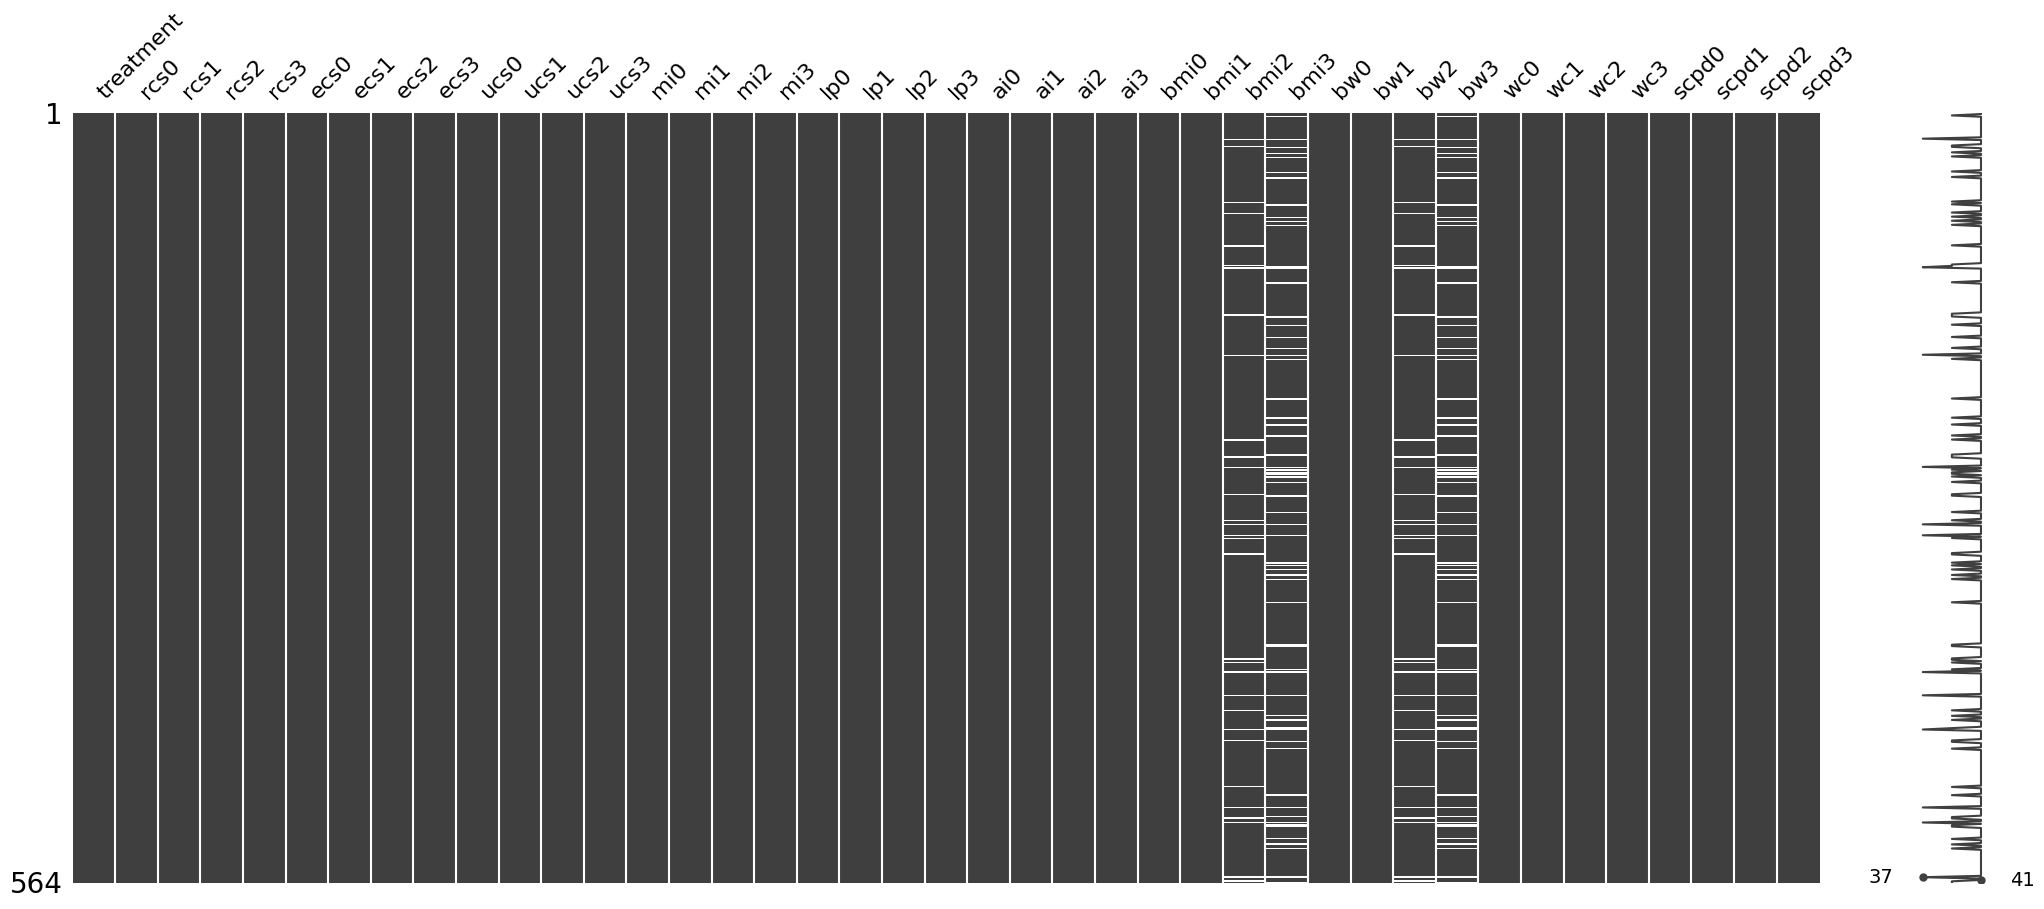

In [92]:
msno.matrix(data);

In [93]:
np.random.seed(12345)
lst = []
for i in range(564):
    lst.append(round(np.random.uniform(12, 18)))
pd.Series(lst)

0      18
1      14
2      13
3      13
4      15
       ..
559    17
560    14
561    14
562    14
563    16
Length: 564, dtype: int64

In [94]:
combined_simulated_data.insert(loc = 1, column = 'Age', value=lst)

In [95]:
np.random.seed(12345)
gen = []
for i in range(564):
    gen.append(round(np.random.uniform(0, 1)))

In [96]:
gender = []
for i in gen:
    if i == 1:
        gender.append('Male')
    else:
        gender.append('Female')

In [97]:
combined_simulated_data.insert(loc = 2, column = 'Gender', value=gender)

In [98]:
np.random.seed(12345)
con = []
for i in range(564):
    con.append(round(np.random.uniform(1, 7)))

In [99]:
country = []
for i in con:
    if i == 1:
        country.append('Cook Islands')
    elif i == 2:
        country.append('Mexico')
    elif i == 3:
        country.append('Marshal Islands')
    elif i == 4:
        country.append('USA')
    elif i == 5:
        country.append('Brazil')
    elif i == 6:
        country.append('Tuvalu')
    elif i == 7:
        country.append('Nauru')

In [100]:
combined_simulated_data.insert(loc = 3, column = 'Country', value=country)

In [102]:
combined_simulated_data

,Treatment,Age,Gender,Country,rcs0,rcs1,rcs2,rcs3,ecs0,ecs1,ecs2,ecs3,ucs0,ucs1,ucs2,ucs3,mi0,mi1,mi2,mi3,lp0,lp1,lp2,lp3,ai0,ai1,ai2,ai3,bmi0,bmi1,bmi2,bmi3,bw0,bw1,bw2,bw3,wc0,wc1,wc2,wc3,scpd0,scpd1,scpd2,scpd3
0,1,18,Male,Nauru,6.0,15.0,10.0,13.0,13.0,14.0,10.0,7.0,10.0,11.0,7.0,6.0,21.0,28.0,21.0,23.0,23.0,30.0,24.0,24.0,15.0,19.0,15.0,14.0,36.077895,40.153637,30.551646,29.792386,104.163065,128.690451,93.285902,87.071168,93.645655,103.732370,90.471882,88.799452,69.841361,78.879147,54.457701,50.212509
1,1,14,Female,Marshal Islands,9.0,11.0,6.0,14.0,14.0,12.0,8.0,7.0,12.0,9.0,4.0,6.0,24.0,24.0,17.0,23.0,27.0,26.0,19.0,24.0,17.0,16.0,11.0,14.0,40.159292,35.505559,25.245632,30.001088,119.982749,111.958995,74.606470,87.777050,99.504544,96.882143,82.630667,89.122336,80.390096,70.338710,44.806975,50.569798
2,1,13,Female,Mexico,5.0,6.0,14.0,18.0,12.0,9.0,11.0,9.0,9.0,5.0,9.0,9.0,20.0,19.0,25.0,27.0,22.0,20.0,28.0,29.0,14.0,12.0,18.0,17.0,34.198951,28.862336,35.315618,32.819333,96.880188,88.045718,110.057113,97.309049,90.948410,87.091520,97.512068,97.310770,64.985061,58.132370,63.122545,59.630770
3,1,13,Female,Mexico,5.0,10.0,5.0,18.0,12.0,11.0,7.0,9.0,8.0,8.0,3.0,9.0,20.0,23.0,16.0,27.0,21.0,24.0,18.0,29.0,14.0,15.0,10.0,17.0,33.982290,33.669523,23.818828,35.611450,96.040401,105.349908,69.583510,106.752676,90.637391,94.176237,80.522139,97.802135,64.425081,66.965155,42.211864,60.174493
4,1,15,Male,USA,16.0,8.0,0.0,16.0,16.0,10.0,4.0,8.0,14.0,6.0,0.0,8.0,31.0,20.0,10.0,25.0,34.0,21.0,11.0,27.0,22.0,13.0,10.0,16.0,49.035710,30.359332,15.592736,33.202011,154.388162,93.434377,40.624160,98.603358,112.246740,89.297756,68.365641,94.074487,103.331994,60.882968,27.250020,56.049638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,3,17,Male,Tuvalu,12.0,4.0,1.0,12.0,16.0,11.0,8.0,12.0,14.0,8.0,5.0,9.0,28.0,18.0,14.0,24.0,34.0,19.0,15.0,27.0,22.0,12.0,10.0,17.0,46.340864,28.900402,29.079757,31.477872,142.449297,85.005959,83.474764,92.222045,109.233798,87.707786,76.945126,94.030994,110.433502,54.986587,32.779246,61.384557
560,3,14,Female,Marshal Islands,5.0,7.0,4.0,12.0,12.0,12.0,10.0,12.0,10.0,10.0,7.0,9.0,20.0,21.0,18.0,25.0,23.0,23.0,20.0,28.0,14.0,15.0,11.0,18.0,35.455351,33.156271,28.383874,33.129276,99.728465,99.503822,81.124830,97.834550,93.945156,93.770655,84.241983,94.956838,69.739507,69.184446,48.509358,63.176939
561,3,14,Female,Marshal Islands,5.0,5.0,5.0,16.0,12.0,12.0,10.0,14.0,11.0,9.0,8.0,11.0,21.0,20.0,19.0,29.0,23.0,22.0,22.0,33.0,15.0,13.0,12.0,22.0,36.322588,31.289284,29.669226,38.167178,103.131986,93.143823,85.465349,114.956493,95.163185,91.110964,86.105635,102.254006,72.981552,62.956054,52.526902,77.303841
562,3,14,Female,Marshal Islands,8.0,7.0,5.0,18.0,14.0,13.0,10.0,15.0,13.0,10.0,8.0,12.0,24.0,21.0,19.0,31.0,29.0,24.0,21.0,36.0,18.0,15.0,12.0,24.0,41.307471,33.595981,30.765542,40.793586,122.695452,101.001719,89.167510,123.882668,102.164426,94.397061,85.274579,106.058235,91.616854,70.651346,50.735362,84.668612


## k = 25, 50

In [103]:
#combined_simulated_data.to_csv("k 25 50 Combined Simulated Data.csv")
# treatment wise imputed data after inducing missing in whole data